## Capstone Project The Battle of Neighborhoods (Week 1)

In [6]:
# proposition theme
!pip install geopy
!conda install -c conda-forge folium=0.5.0 --yes 

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
%matplotlib inline 
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


### In order to use the resources of Foursquare, I propose to simulate a search for the best situation if I want to visit the capital of a country in the world.
I did a search on google so as not to be biased in the choice of monuments to discover in each capital. my research is therefore: the name of a capital + «tourist places»
I had these results for these four cities : Washington, Paris, Rome, London

In [2]:
##conda update -n base -c defaults conda

## Data For Washington DC Top attractions

In [3]:
data = [['Lincoln Memorial', 38.8893, -77.0502], ['National Air and Sapce Museum', 38.8882, -77.0199], ['National Mall', 38.8896, -77.0230], ['Vietnam Veterans Memorial', 38.8913, -77.0477]] 

In [4]:
wash_data= pd.DataFrame(data, columns = ['Places', 'Latitude','Longitude']) 

In [5]:
wash_data

,Places,Latitude,Longitude
0,Lincoln Memorial,38.8893,-77.0502
1,National Air and Sapce Museum,38.8882,-77.0199
2,National Mall,38.8896,-77.0230
3,Vietnam Veterans Memorial,38.8913,-77.0477


### Getting Coordinates of Washington DC

In [8]:
address = 'Washington DC, US'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Washington DC are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Washington DC are 38.8948932, -77.0365529.


In [9]:
# credate map of Paris using latitude and longitude values
map_wash = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, label in zip(wash_data['Latitude'], wash_data['Longitude'], wash_data['Places']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='black',
        fill_opacity=0.7,
        parse_html=False).add_to(map_wash)  
    
map_wash

In [10]:
CLIENT_ID = '1EH01SK1KF05C4GKBFLMWEPRE2EWBS10TKXQE4X3DQUELTFA' # your Foursquare ID
CLIENT_SECRET = 'VJFZ4UL3PP0ZHZS3G4IFIVTBSSUSM5QIFLTMLMPJYAJEMRWG' # your Foursquare Secret
VERSION = '20190309' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1EH01SK1KF05C4GKBFLMWEPRE2EWBS10TKXQE4X3DQUELTFA
CLIENT_SECRET:VJFZ4UL3PP0ZHZS3G4IFIVTBSSUSM5QIFLTMLMPJYAJEMRWG


In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Lieux', 
                  'Lieux Latitude', 
                  'Lieux Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'        
                   ]
    
    return(nearby_venues)

In [12]:
wash_data_venues = getNearbyVenues(names=wash_data['Places'],
                                   latitudes=wash_data['Latitude'],
                                   longitudes=wash_data['Longitude']
                                  )

Lincoln Memorial
National Air and Sapce Museum
National Mall
Vietnam Veterans Memorial


In [13]:
print(wash_data_venues.shape)
wash_data_venues

(140, 8)


,Lieux,Lieux Latitude,Lieux Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,Lincoln Memorial,38.8893,-77.0502,Lincoln Memorial,4a4fbaecf964a520a0af1fe3,38.889267,-77.050166,Monument / Landmark
1,Lincoln Memorial,38.8893,-77.0502,Vietnam Veterans Memorial - Three Servicemen S...,504ca3e0e889b404915747e2,38.890640,-77.048257,Outdoor Sculpture
2,Lincoln Memorial,38.8893,-77.0502,Korean War Veterans Memorial,4a491e86f964a520ffaa1fe3,38.887790,-77.047472,Monument / Landmark
3,Lincoln Memorial,38.8893,-77.0502,Vietnam Veterans Memorial,4a500fe1f964a520f2af1fe3,38.891262,-77.047707,Monument / Landmark
4,Lincoln Memorial,38.8893,-77.0502,Memorial Bridge Equestrian Statues,4c0c0e8399459521159974dd,38.888547,-77.052075,Sculpture Garden
5,Lincoln Memorial,38.8893,-77.0502,Albert Einstein Memorial,4a4fbc96f964a520a5af1fe3,38.892334,-77.048351,Outdoor Sculpture
6,Lincoln Memorial,38.8893,-77.0502,Lincoln Memorial Reflecting Pool,4b65f636f964a5203e0b2be3,38.889491,-77.045649,Monument / Landmark
7,Lincoln Memorial,38.8893,-77.0502,West Potomac Park,4bc0aeceabf49521f8a0bf93,38.886223,-77.047334,Park
8,Lincoln Memorial,38.8893,-77.0502,Lincoln Memorial Sand Volleyball Courts,4ba3e8d3f964a520b66c38e3,38.891183,-77.053744,Volleyball Court
9,Lincoln Memorial,38.8893,-77.0502,Gifts & Cafe,4dded899b0fbc2c4ef0cca12,38.890800,-77.049302,Gift Shop


In [15]:
wash_data_venues.groupby('Lieux').count()

,Lieux Latitude,Lieux Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
Lieux,,,,,,,
Lincoln Memorial,13,13,13,13,13,13,13
National Air and Sapce Museum,47,47,47,47,47,47,47
National Mall,62,62,62,62,62,62,62
Vietnam Veterans Memorial,18,18,18,18,18,18,18


In [16]:
df_view = wash_data_venues.groupby('Lieux').count()
df_toto = df_view['Venue Category']
df_toto

Lieux
Lincoln Memorial                 13
National Air and Sapce Museum    47
National Mall                    62
Vietnam Veterans Memorial        18
Name: Venue Category, dtype: int64

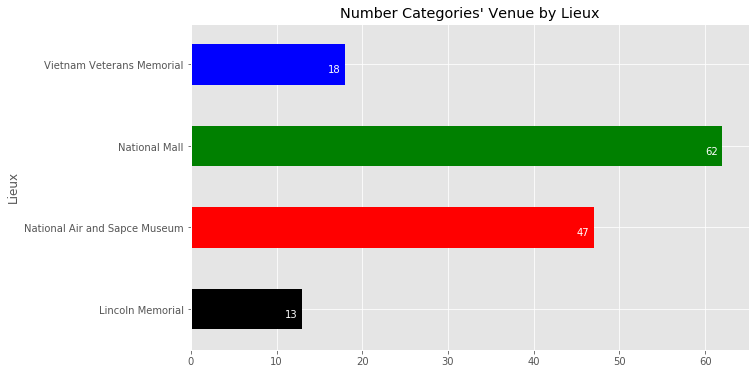

In [19]:
df_toto.plot(kind='barh', figsize=(10,6),color=['black', 'red', 'green', 'blue'])

#plt.xlabel('name') # add to x-label to the plot
#plt.ylabel('Number de categories') # add y-label to the plot
plt.title('Number Categories\' Venue by Lieux') # add title to the plot

for index, value in enumerate(df_toto): 
    label = format(int(value), ',') 
    plt.annotate(label, xy=(value - 2, index - 0.10), color='white')
    
plt.show()

In [20]:
print('There are {} uniques categories.'.format(len(wash_data_venues['Venue Category'].unique())))
print(wash_data_venues['Venue Category'].unique() )

There are 44 uniques categories.
['Monument / Landmark' 'Outdoor Sculpture' 'Sculpture Garden' 'Park'
 'Volleyball Court' 'Gift Shop' 'Snack Place' 'Baseball Field'
 'Science Museum' 'Planetarium' 'Exhibit' 'Food Truck' 'Art Museum'
 'Movie Theater' 'Plaza' 'Scenic Lookout' 'Deli / Bodega' 'History Museum'
 'Hotel' 'Performing Arts Venue' 'Coffee Shop' 'Skating Rink' 'Garden'
 'Public Art' 'Museum' 'Government Building' 'Sandwich Place' 'Fountain'
 'Building' 'Theme Park Ride / Attraction' 'Pizza Place' 'Café'
 'Food Court' 'Art Gallery' 'American Restaurant' 'Bakery' 'Bank'
 'French Restaurant' 'Train Station' 'Ice Cream Shop' 'Donut Shop' 'Lake'
 'Outdoors & Recreation' 'Soccer Field']


In [21]:
wash_onehot = pd.get_dummies(wash_data_venues[['Venue Category']], prefix="", prefix_sep="")

# add Lieux column back to dataframe
wash_onehot['Lieux'] = wash_data_venues['Lieux'] 

# move lieux column to the first column
fixed_columns = [wash_onehot.columns[-1]] + list(wash_onehot.columns[:-1])
wash_onehot = wash_onehot[fixed_columns]

wash_onehot.head()

,Lieux,American Restaurant,Art Gallery,Art Museum,Bakery,Bank,Baseball Field,Building,Café,Coffee Shop,Deli / Bodega,Donut Shop,Exhibit,Food Court,Food Truck,Fountain,French Restaurant,Garden,Gift Shop,Government Building,History Museum,Hotel,Ice Cream Shop,Lake,Monument / Landmark,Movie Theater,Museum,Outdoor Sculpture,Outdoors & Recreation,Park,Performing Arts Venue,Pizza Place,Planetarium,Plaza,Public Art,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Skating Rink,Snack Place,Soccer Field,Theme Park Ride / Attraction,Train Station,Volleyball Court
0,Lincoln Memorial,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Lincoln Memorial,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Lincoln Memorial,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Lincoln Memorial,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Lincoln Memorial,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [22]:
wash_grouped = wash_onehot.groupby('Lieux').mean().reset_index()
wash_grouped

,Lieux,American Restaurant,Art Gallery,Art Museum,Bakery,Bank,Baseball Field,Building,Café,Coffee Shop,Deli / Bodega,Donut Shop,Exhibit,Food Court,Food Truck,Fountain,French Restaurant,Garden,Gift Shop,Government Building,History Museum,Hotel,Ice Cream Shop,Lake,Monument / Landmark,Movie Theater,Museum,Outdoor Sculpture,Outdoors & Recreation,Park,Performing Arts Venue,Pizza Place,Planetarium,Plaza,Public Art,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Skating Rink,Snack Place,Soccer Field,Theme Park Ride / Attraction,Train Station,Volleyball Court
0,Lincoln Memorial,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.307692,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.000000,0.000000,0.076923
1,National Air and Sapce Museum,0.000000,0.021277,0.106383,0.000000,0.000000,0.000000,0.021277,0.021277,0.021277,0.021277,0.000000,0.085106,0.021277,0.191489,0.021277,0.000000,0.021277,0.021277,0.021277,0.021277,0.021277,0.000000,0.000000,0.000000,0.021277,0.021277,0.000000,0.000000,0.000000,0.021277,0.021277,0.021277,0.042553,0.021277,0.021277,0.021277,0.085106,0.021277,0.021277,0.000000,0.000000,0.021277,0.000000,0.000000
2,National Mall,0.016129,0.016129,0.096774,0.016129,0.016129,0.000000,0.000000,0.032258,0.064516,0.000000,0.000000,0.080645,0.000000,0.145161,0.000000,0.016129,0.016129,0.016129,0.000000,0.048387,0.000000,0.016129,0.000000,0.016129,0.016129,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.016129,0.048387,0.000000,0.000000,0.016129,0.177419,0.032258,0.016129,0.016129,0.000000,0.000000,0.016129,0.000000
3,Vietnam Veterans Memorial,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.111111,0.000000,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,0.055556,0.222222,0.000000,0.000000,0.111111,0.055556,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.055556,0.000000,0.055556,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000


In [23]:
num_top_venues = 20

for hood in wash_grouped['Lieux']:
    print("----"+hood+"----")
    temp = wash_grouped[wash_grouped['Lieux'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Lincoln Memorial----
                    venue  freq
0     Monument / Landmark  0.31
1       Outdoor Sculpture  0.15
2        Sculpture Garden  0.15
3        Volleyball Court  0.08
4          Baseball Field  0.08
5             Snack Place  0.08
6                    Park  0.08
7               Gift Shop  0.08
8             Planetarium  0.00
9                  Museum  0.00
10  Outdoors & Recreation  0.00
11  Performing Arts Venue  0.00
12            Pizza Place  0.00
13         Sandwich Place  0.00
14                  Plaza  0.00
15             Public Art  0.00
16         Scenic Lookout  0.00
17         Science Museum  0.00
18           Skating Rink  0.00
19           Soccer Field  0.00


----National Air and Sapce Museum----
                    venue  freq
0              Food Truck  0.19
1              Art Museum  0.11
2          Science Museum  0.09
3                 Exhibit  0.09
4                   Plaza  0.04
5                  Garden  0.02
6                   Hotel  0.02
7      

In [24]:
#Let's put that into a pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
#Now let's create the new dataframe 
#and display the top 20 venues for each.
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Lieux']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
lieux_venues_sorted = pd.DataFrame(columns=columns)
lieux_venues_sorted['Lieux'] = wash_grouped['Lieux']

for ind in np.arange(wash_grouped.shape[0]):
    lieux_venues_sorted.iloc[ind, 1:] = return_most_common_venues(wash_grouped.iloc[ind, :], num_top_venues)

lieux_venues_sorted

,Lieux,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Lincoln Memorial,Monument / Landmark,Sculpture Garden,Outdoor Sculpture,Volleyball Court,Park,Baseball Field,Gift Shop,Snack Place,Food Court,Garden,French Restaurant,Art Gallery,Fountain,Food Truck,Art Museum,Bank,Bakery,Exhibit,Donut Shop,Government Building
1,National Air and Sapce Museum,Food Truck,Art Museum,Exhibit,Science Museum,Plaza,Gift Shop,Government Building,History Museum,Hotel,Coffee Shop,Café,Building,Movie Theater,Museum,Fountain,Performing Arts Venue,Food Court,Deli / Bodega,Pizza Place,Planetarium
2,National Mall,Science Museum,Food Truck,Art Museum,Exhibit,Coffee Shop,History Museum,Plaza,Café,Museum,Sculpture Garden,Monument / Landmark,Bank,Bakery,French Restaurant,Garden,Gift Shop,Art Gallery,Train Station,Ice Cream Shop,American Restaurant
3,Vietnam Veterans Memorial,Monument / Landmark,Outdoor Sculpture,Food Truck,Gift Shop,Donut Shop,Garden,Plaza,Lake,Scenic Lookout,Sculpture Garden,Snack Place,Soccer Field,Outdoors & Recreation,Food Court,Fountain,Exhibit,French Restaurant,Volleyball Court,Deli / Bodega,Coffee Shop


In [26]:
# set number of clusters
kclusters = 3

wash_grouped_clustering = wash_grouped.drop('Lieux', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(wash_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 1, 2])

In [29]:
#Let's create a new dataframe that includes the cluster as well as the top 5 venues for each Lieux.

wash_merged = wash_data

# add clustering labels
wash_merged['Cluster Labels'] = kmeans.labels_

wash_merged = wash_merged.join(lieux_venues_sorted.set_index('Lieux'), on='Places')
wash_merged 
# check the last columns!

,Places,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Lincoln Memorial,38.8893,-77.0502,0,Monument / Landmark,Sculpture Garden,Outdoor Sculpture,Volleyball Court,Park,Baseball Field,Gift Shop,Snack Place,Food Court,Garden,French Restaurant,Art Gallery,Fountain,Food Truck,Art Museum,Bank,Bakery,Exhibit,Donut Shop,Government Building
1,National Air and Sapce Museum,38.8882,-77.0199,1,Food Truck,Art Museum,Exhibit,Science Museum,Plaza,Gift Shop,Government Building,History Museum,Hotel,Coffee Shop,Café,Building,Movie Theater,Museum,Fountain,Performing Arts Venue,Food Court,Deli / Bodega,Pizza Place,Planetarium
2,National Mall,38.8896,-77.0230,1,Science Museum,Food Truck,Art Museum,Exhibit,Coffee Shop,History Museum,Plaza,Café,Museum,Sculpture Garden,Monument / Landmark,Bank,Bakery,French Restaurant,Garden,Gift Shop,Art Gallery,Train Station,Ice Cream Shop,American Restaurant
3,Vietnam Veterans Memorial,38.8913,-77.0477,2,Monument / Landmark,Outdoor Sculpture,Food Truck,Gift Shop,Donut Shop,Garden,Plaza,Lake,Scenic Lookout,Sculpture Garden,Snack Place,Soccer Field,Outdoors & Recreation,Food Court,Fountain,Exhibit,French Restaurant,Volleyball Court,Deli / Bodega,Coffee Shop


In [31]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(wash_merged['Latitude'], wash_merged['Longitude'], wash_merged['Places'], wash_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [32]:
# Cluster 0 == Musée du louvre
wash_merged.loc[wash_merged['Cluster Labels'] == 0, wash_merged.columns[[1] + list(range(5, wash_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,38.8893,Sculpture Garden,Outdoor Sculpture,Volleyball Court,Park,Baseball Field,Gift Shop,Snack Place,Food Court,Garden,French Restaurant,Art Gallery,Fountain,Food Truck,Art Museum,Bank,Bakery,Exhibit,Donut Shop,Government Building


In [33]:
# Cluster 1 == National mall   Vietnam Veterans Memorial	
wash_merged.loc[wash_merged['Cluster Labels'] == 1, wash_merged.columns[[1] + list(range(5, wash_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
1,38.8882,Art Museum,Exhibit,Science Museum,Plaza,Gift Shop,Government Building,History Museum,Hotel,Coffee Shop,Café,Building,Movie Theater,Museum,Fountain,Performing Arts Venue,Food Court,Deli / Bodega,Pizza Place,Planetarium
2,38.8896,Food Truck,Art Museum,Exhibit,Coffee Shop,History Museum,Plaza,Café,Museum,Sculpture Garden,Monument / Landmark,Bank,Bakery,French Restaurant,Garden,Gift Shop,Art Gallery,Train Station,Ice Cream Shop,American Restaurant


In [34]:
# Cluster 2 == Vietnam Veterans Memorial	
wash_merged.loc[wash_merged['Cluster Labels'] == 2, wash_merged.columns[[1] + list(range(5, wash_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
3,38.8913,Outdoor Sculpture,Food Truck,Gift Shop,Donut Shop,Garden,Plaza,Lake,Scenic Lookout,Sculpture Garden,Snack Place,Soccer Field,Outdoors & Recreation,Food Court,Fountain,Exhibit,French Restaurant,Volleyball Court,Deli / Bodega,Coffee Shop
